**Сбербанк, Работа с данными на Python. Толстиков Валентин**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [2]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    FONT_SIZE = 30
    plt.figure(figsize=figsize)
    plt.barh(np.arange(len(bars_length)), bars_length, tick_label=yticks_labels, alpha=0.4)
    plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    for i, bar in enumerate(bars_length):
        plt.text(max(0, bar), i, labels[i], va='center', fontsize=FONT_SIZE)
    plt.grid(True)
    plt.show()

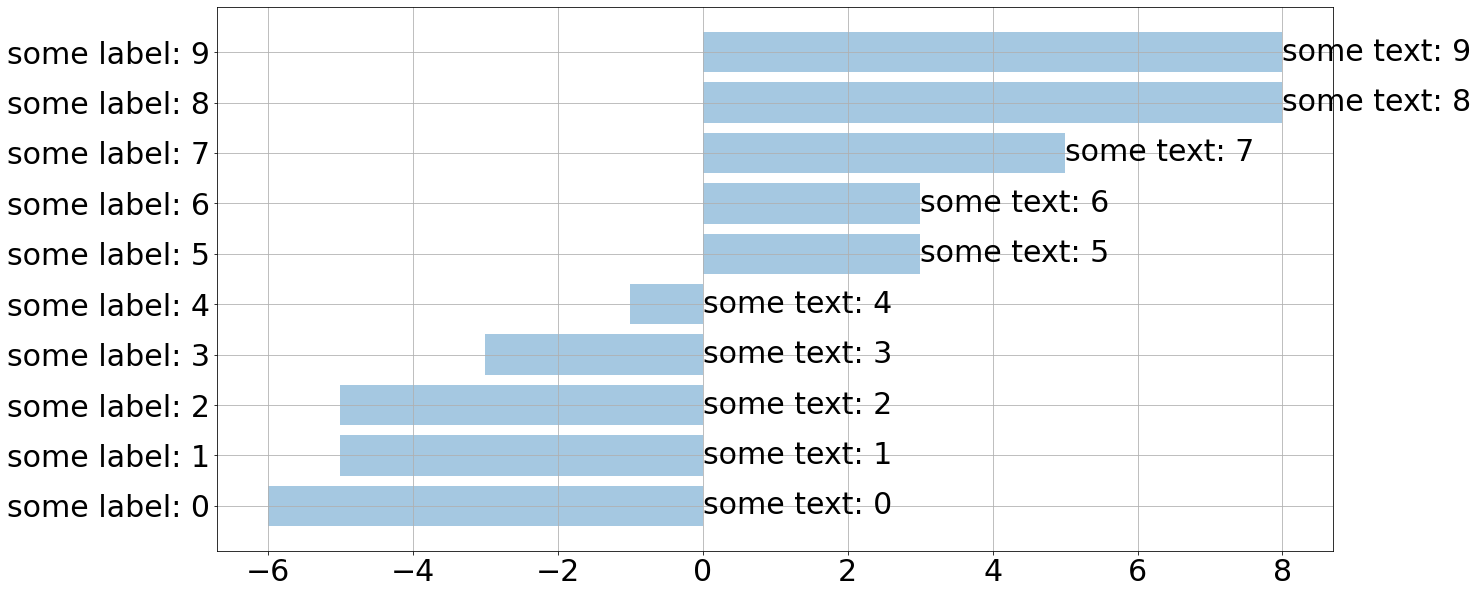

In [3]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

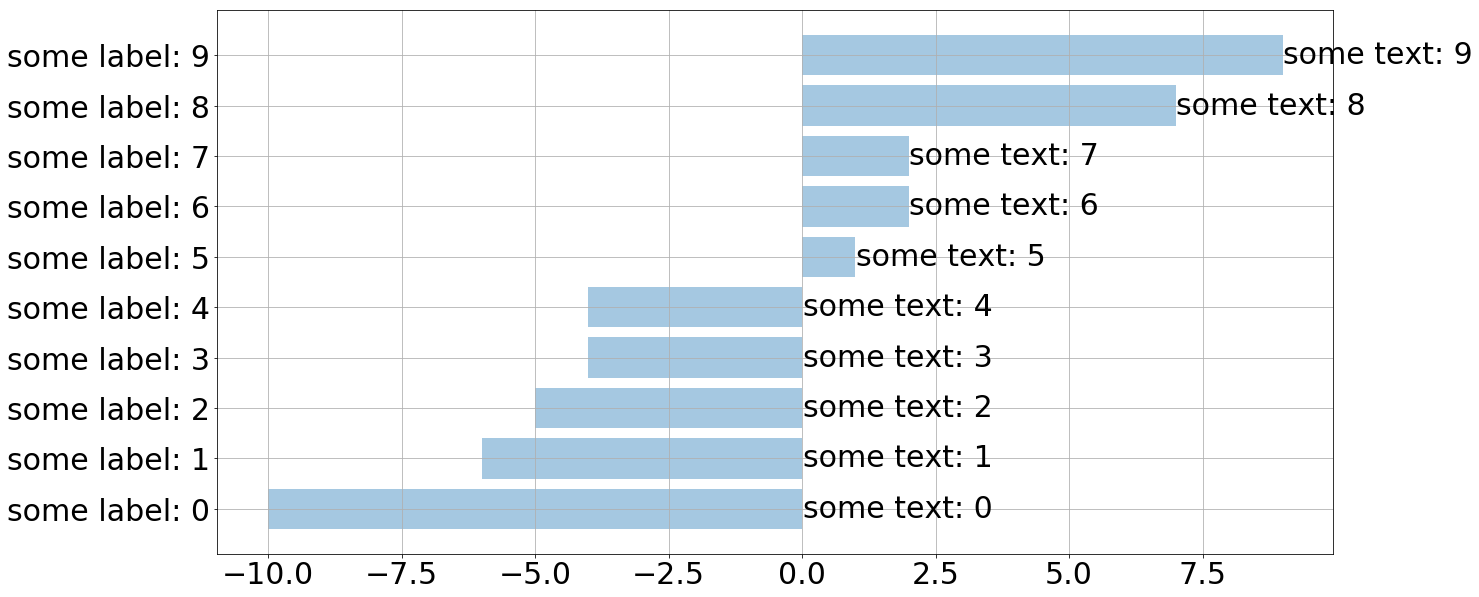

In [1]:
# Контрольное изображение:

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
def plot_time_probabilities(tb, figsize):
    FONT_SIZE = 14
    plt.figure(figsize=figsize)
    cmap = cm.get_cmap('coolwarm')
    cmap = cmap(np.linspace(0, 1, len(tb.columns)))
    y1 = pd.Series(0, index=tb.index)
    for i, col in enumerate(tb.columns):
        y2 = y1 + tb[col]
        plt.fill_between(tb.index, y1, y2, label='Probability: {}'.format(str(i)), fc=cmap[i], ec=cmap[i])
        if i != 0:
            plt.plot(tb.index, y2, c='k', alpha=0.1, linewidth=2)
        y1 = y2.copy()
    
    plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    plt.legend(loc='lower left', prop={'size': FONT_SIZE})
    plt.grid(axis='x')
    plt.show()

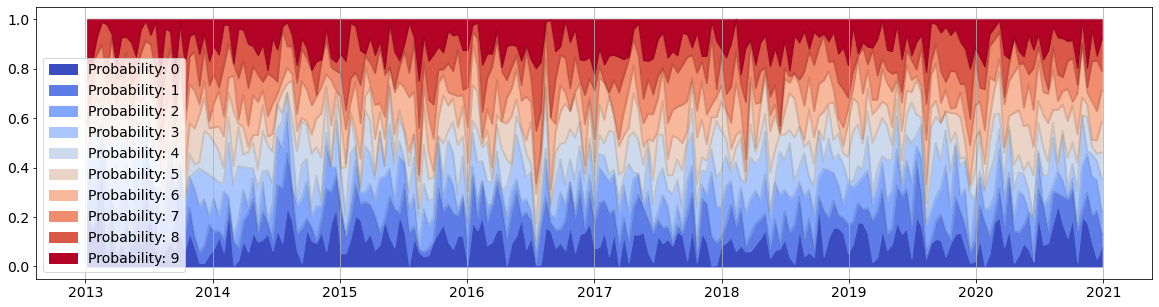

In [5]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

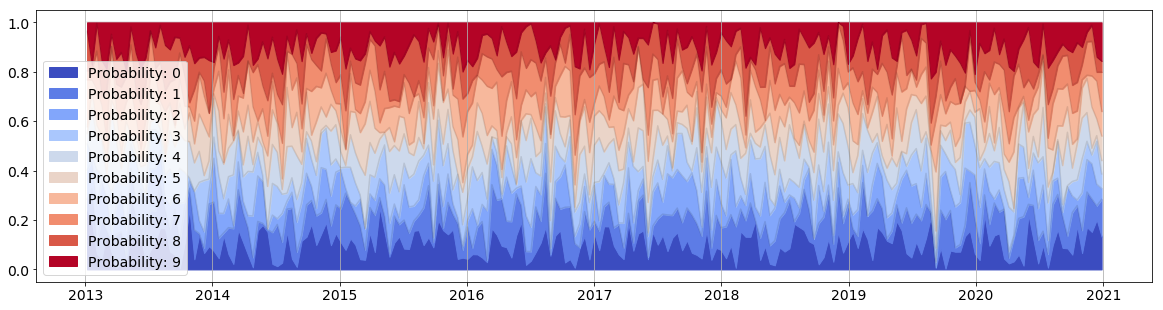

In [2]:
# Контрольное изображение:

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [6]:
def plot_intraday_ts(intraday_ts, figsize):
    FONT_SIZE_LABEL = 15
    FONT_SIZE_TICKS = 10
    
    ts = intraday_ts.fillna(intraday_ts.mean())
    ts.index = pd.MultiIndex.from_arrays([ts.index.date, ts.index.time], names=['Date', 'Time'])
    ts = ts.unstack(level=0)
    
    fig, ax = plt.subplots(figsize=figsize)
    fig.set_figheight(figsize[1] * 6.66 / 7)
    сs = ax.pcolormesh(ts, cmap='RdBu_r', edgecolors='white')
    cbar = plt.colorbar(сs, ax=[ax], location='left', pad=0.032, aspect=22, shrink=1.05, fraction=0.02)
    cbar.ax.yaxis.tick_right()
    cbar.ax.tick_params(labelsize=FONT_SIZE_TICKS)
    ax.yaxis.tick_right()
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS)
    x_tick_labels = ts.columns.strftime('%B %d')
    ax.set_xticks(np.arange(1, len(x_tick_labels), 2))
    ax.set_xticklabels(x_tick_labels[1::2], rotation=40)
    y_tick_labels = [x.strftime('%H:%M') for x in ts.index]
    ax.set_yticks(np.arange(1, len(y_tick_labels), 2))
    ax.set_yticklabels(y_tick_labels[1::2])
    ax.set_xlabel('Дата', fontsize=FONT_SIZE_LABEL)
    ax.set_ylabel('Время', fontsize=FONT_SIZE_LABEL)
    plt.show()

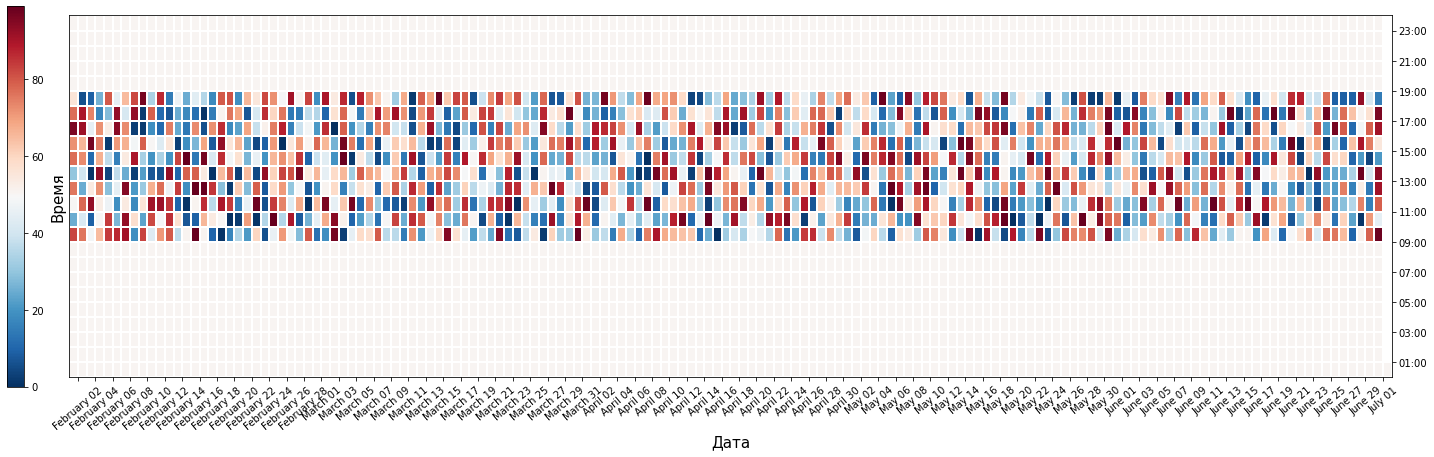

In [7]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

plot_intraday_ts(intraday_ts, figsize)

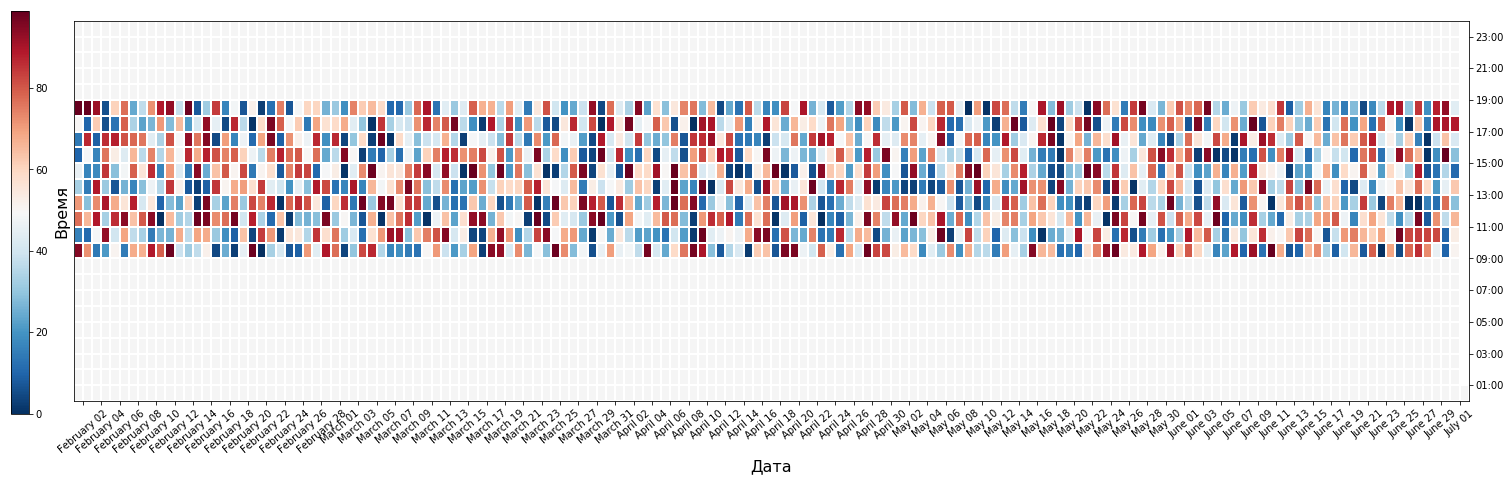

In [3]:
# Контрольное изображение: